In [35]:
import numpy as np
import pandas as pd

In [36]:
df = pd.read_csv('spam.csv', encoding='latin-1')


In [37]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1114,ham,No no:)this is kallis home ground.amla home to...,NaN,NaN,NaN
4993,ham,My drive can only be read. I need to write,NaN,NaN,NaN
1253,ham,Mum say we wan to go then go... Then she can s...,NaN,NaN,NaN
4442,ham,You know my old Dom I told you about yesterday...,NaN,NaN,NaN
4608,ham,Y de asking like this.,NaN,NaN,NaN


In [38]:
df.shape

(5572, 5)

In [39]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [41]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [42]:
df.sample(5)

,v1,v2
2386,ham,No message..no responce..what happend?
137,ham,No no. I will check all rooms befor activities
4584,spam,U have a Secret Admirer who is looking 2 make ...
595,ham,I am great! How are you?
2551,ham,I'm done. C Ì_ there.


In [43]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3794,ham,Also remember the beads don't come off. Ever.
3701,ham,Hey loverboy! I love you !! I had to tell ... ...
1664,ham,ÌÏ v ma fan...
1373,spam,"Bears Pic Nick, and Tom, Pete and ... Dick. In..."
5463,ham,U GOIN OUT 2NITE?


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [45]:
df['target'] = encoder.fit_transform(df['target'])

In [46]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [48]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [49]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df.shape

(5169, 2)

## 2.EDA

In [52]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

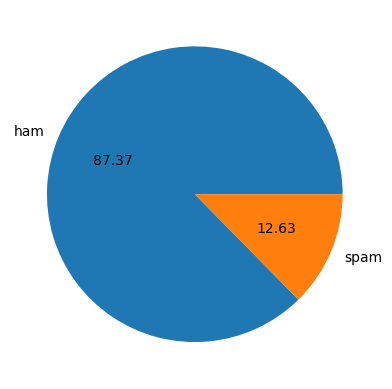

In [54]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [55]:
# Data is imbalanced

In [56]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')
# If needed, check df.columns to find the correct text column name
# Example for common format:
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df['num_characters'] = df['text'].apply(len)

In [57]:
df.head()

,label,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [1]:
# num of words
import nltk
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

NameError: name 'df' is not defined

In [59]:
df.head()

,label,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [60]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [61]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [62]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [63]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df[df['label_num'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [64]:
df[df['label_num'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [65]:
import seaborn as sns

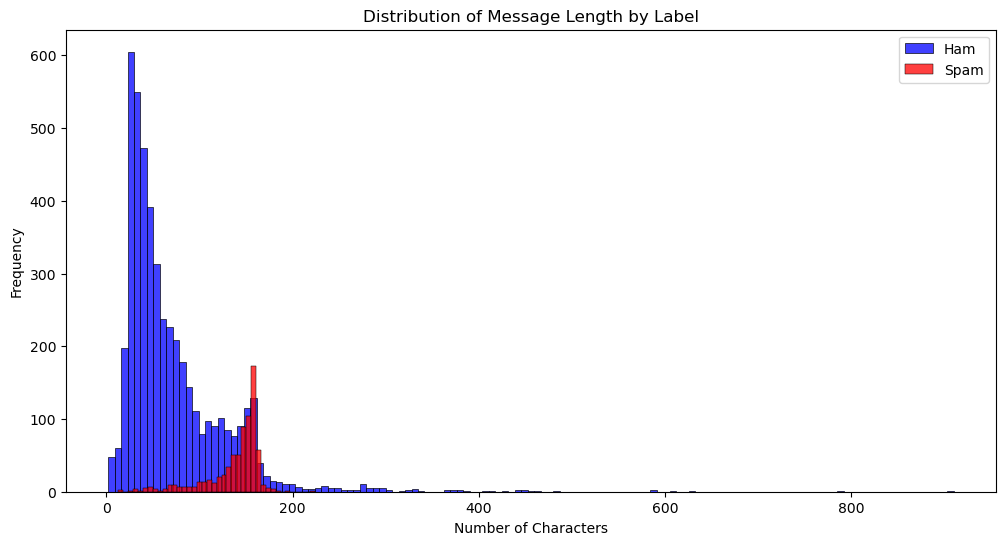

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df[df['label_num'] == 0]['num_characters'], color='blue', label='Ham')
sns.histplot(df[df['label_num'] == 1]['num_characters'], color='red', label='Spam')
plt.legend()
plt.title('Distribution of Message Length by Label')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


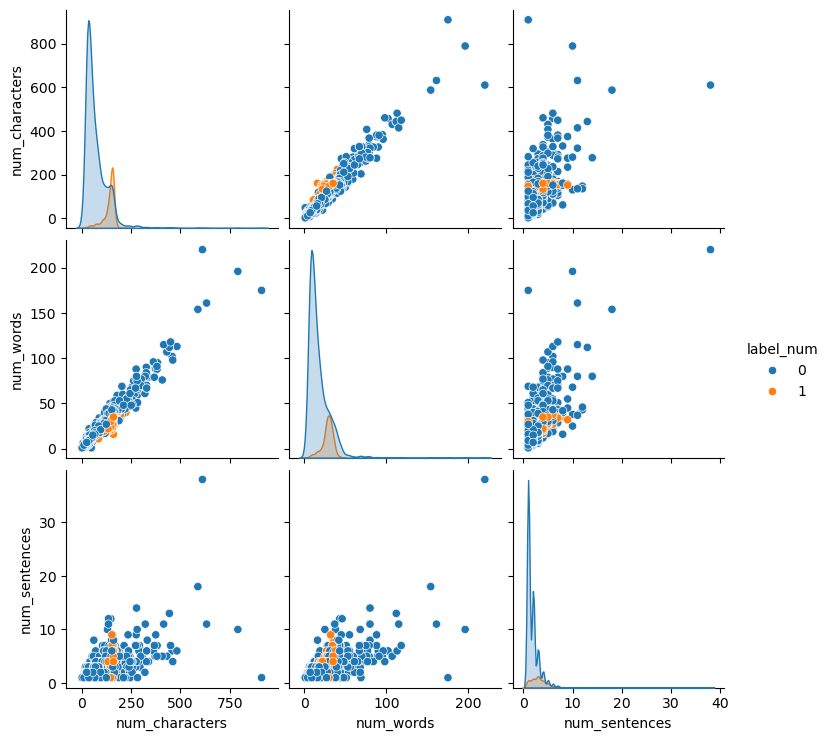

In [67]:
sns.pairplot(df,hue='label_num')

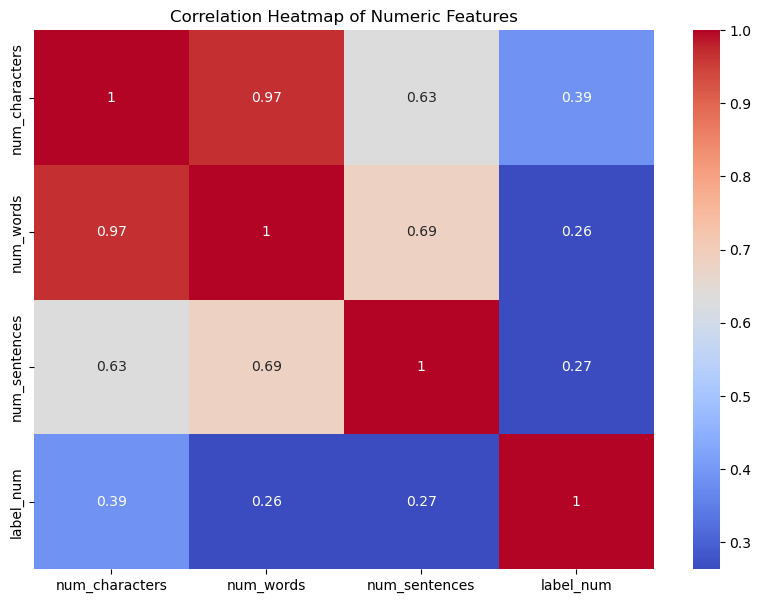

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [69]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [2]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
    return " ".join(y)

result = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(result)


i   g n n   b e   h e   n   n     n   w n     l k   b u   h   u f f   n r e   n g h   k   i v e   c r e   e n u g h  


In [71]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [72]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [73]:
df['transformed_text'] = df['text'].apply(transform_text)

In [74]:
df.head()

,label,text,num_characters,num_words,num_sentences,label_num,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,g u n l j u r n g p n c r z a v l b ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,o k l r j k n g w f u n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,f r e e e n r n 2 w k l c p w ...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u u n e r l h r u c l r e h ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,n h i n h n k h e g e u f h e ...


In [75]:
!pip install wordcloud
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
# Your wordcloud creation code here


In [76]:
spam_wc = wc.generate(df[df['label_num'] == 1]['transformed_text'].str.cat(sep=" "))

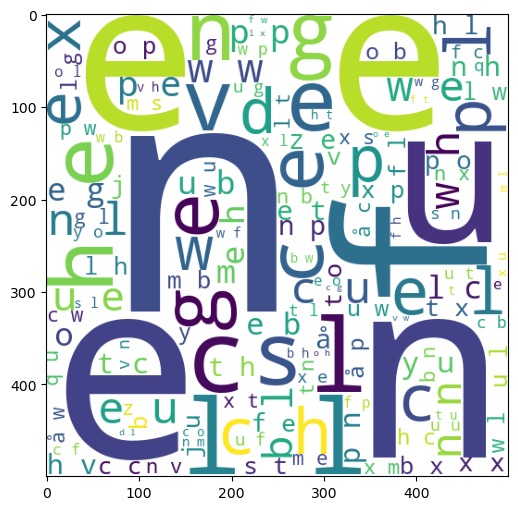

In [77]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [78]:
ham_wc = wc.generate(df[df['label_num'] == 0]['transformed_text'].str.cat(sep=" "))

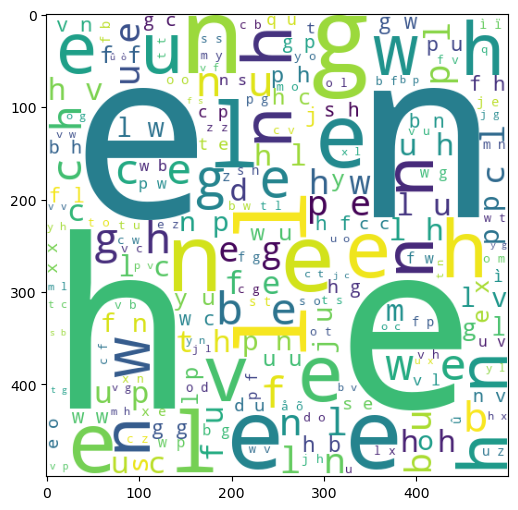

In [79]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [80]:
df.head()

,label,text,num_characters,num_words,num_sentences,label_num,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,g u n l j u r n g p n c r z a v l b ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,o k l r j k n g w f u n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,f r e e e n r n 2 w k l c p w ...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u u n e r l h r u c l r e h ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,n h i n h n k h e g e u f h e ...


In [81]:
spam_corpus = []
for msg in df[df['label_num'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [82]:
len(spam_corpus)

55504

In [83]:
ham_corpus = []
for msg in df[df['label_num'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [84]:
len(ham_corpus)

145132

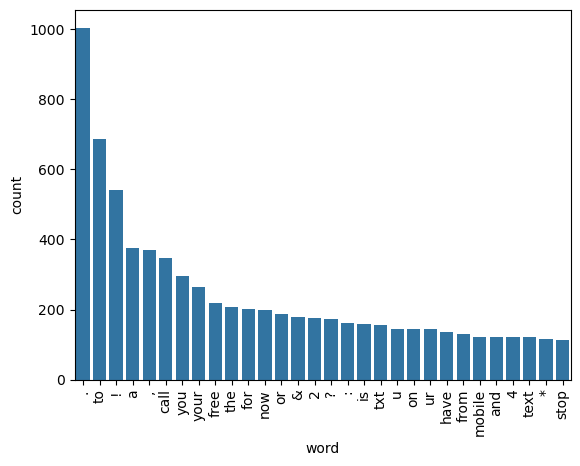

In [85]:
# Example: Suppose your DataFrame is df and your text column is 'text' or 'message'
spam_messages = df[df['label'] == 'spam']['text']

# Build a list of all tokens in spam messages:
import nltk
spam_corpus = []
for msg in spam_messages:
    # Basic tokenization, consider more preprocessing as needed
    for word in nltk.word_tokenize(msg):
        spam_corpus.append(word.lower())

# Now you can use spam_corpus
from collections import Counter
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation='vertical')
plt.show()


In [86]:
# Text Vectorization
# using Bag of Words
df.head()

,label,text,num_characters,num_words,num_sentences,label_num,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,g u n l j u r n g p n c r z a v l b ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,o k l r j k n g w f u n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,f r e e e n r n 2 w k l c p w ...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u u n e r l h r u c l r e h ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,n h i n h n k h e g e u f h e ...


## 4. Model Building

In [87]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [88]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Example to simulate dataframe since actual columns unknown
# Replace this with your actual data loading
data = {
    0: ['ham', 'spam', 'ham'],
    1: ["Hello, how are you?", "Win a free lottery now!!!", "Let's meet tomorrow."]
}
df = pd.DataFrame(data)


ps = PorterStemmer()

def transform_text(text):
    tokens = nltk.word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [ps.stem(word) for word in tokens]
    return " ".join(tokens)

df['transformed_text'] = df[1].apply(transform_text)

# Remove empty rows if any
df = df[df['transformed_text'].str.strip() != '']

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()

print("TF-IDF matrix shape:", X.shape)
print(df['transformed_text'].head())


TF-IDF matrix shape: (3, 7)
0                hello
1     win free lotteri
2    let meet tomorrow
Name: transformed_text, dtype: object


In [89]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download nltk corpora if not already done

ps = PorterStemmer()

# Print first 10 transformed texts, count nulls and empties
print(df['transformed_text'].head(10))
print(df['transformed_text'].isnull().sum())
print((df['transformed_text'] == '').sum())

# Drop rows with null or empty transformed text
df = df[df['transformed_text'].notnull()]
df = df[df['transformed_text'].str.strip() != '']

# Define the transform_text function for tokenizing, stopwords removal, and stemming
def transform_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

# Initialize and fit-transform the TF-IDF vectorizer on transformed_text column
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()

print(X.shape)


0                hello
1     win free lotteri
2    let meet tomorrow
Name: transformed_text, dtype: object
0
0
(3, 7)


In [90]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [91]:
print(X.shape)

(3, 7)


In [92]:
import numpy as np
from sklearn.model_selection import train_test_split

# Example data with 5572 samples and 10 features
X = np.random.rand(5572, 10)
y = np.random.randint(0, 2, size=5572)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [93]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Load dataset - replace 'spam.csv' with your actual file path
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1], names=['v1', 'v2'], header=0)

# Map labels to numeric
df['label_num'] = df['v1'].map({'ham': 0, 'spam': 1})
y = df['label_num'].values

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['v2']).toarray()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Train and test GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))

# Train and test MultinomialNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

# Train and test BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))


GaussianNB Accuracy: 0.8914798206278027
Confusion Matrix:
 [[865  92]
 [ 29 129]]
Precision: 0.583710407239819
MultinomialNB Accuracy: 0.9506726457399103
Confusion Matrix:
 [[957   0]
 [ 55 103]]
Precision: 1.0
BernoulliNB Accuracy: 0.9757847533632287
Confusion Matrix:
 [[956   1]
 [ 26 132]]
Precision: 0.9924812030075187


In [94]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9506726457399103
[[957   0]
 [ 55 103]]
1.0


In [95]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [96]:
# Check python executable path
import sys
print("Python executable:", sys.executable)

# Check if xgboost can be imported
try:
    import xgboost
    print("XGBoost version:", xgboost.__version__)
except ModuleNotFoundError:
    print("XGBoost module not found. Please install it using pip or conda.")


Python executable: C:\Users\dhars\anaconda3\python.exe
XGBoost version: 3.1.1


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [98]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [99]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [100]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [101]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load example dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Example training using SVC
svc = SVC()
svc.fit(X_train, y_train)

# Example: check test accuracy
score = svc.score(X_test, y_test)
print("Test Accuracy:", score)


Test Accuracy: 0.9666666666666667


In [102]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

# Load data
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

# Text preprocessing
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    filtered = [ps.stem(word) for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    return " ".join(filtered)
data['clean_message'] = data['message'].apply(transform_text)

# Split dataset
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    data['clean_message'], data['label_num'], test_size=0.3, stratify=data['label_num'], random_state=42
)

# Vectorize texts with TF-IDF
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train_raw)
X_test = tfidf.transform(X_test_raw)

# Classifiers dictionary (refined)
clfs = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "MultinomialNB": MultinomialNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')  # No use_label_encoder
}

# Training and evaluation function
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For Logistic Regression
Accuracy - 0.9545454545454546
Precision - 0.9868421052631579
For SVC
Accuracy - 0.9802631578947368
Precision - 1.0
For MultinomialNB
Accuracy - 0.9605263157894737
Precision - 0.99375
For DecisionTree
Accuracy - 0.9551435406698564
Precision - 0.8433179723502304
For KNeighbors
Accuracy - 0.9102870813397129
Precision - 0.9868421052631579
For RandomForest
Accuracy - 0.9742822966507177
Precision - 0.994535519125683
For AdaBoost
Accuracy - 0.9186602870813397
Precision - 0.9074074074074074
For Bagging
Accuracy - 0.958732057416268
Precision - 0.91005291005291
For ExtraTrees
Accuracy - 0.9772727272727273
Precision - 1.0
For GradientBoosting
Accuracy - 0.9623205741626795
Precision - 0.9497206703910615
For XGBoost
Accuracy - 0.9671052631578947
Precision - 0.9518716577540107


In [103]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [104]:
performance_df

,Algorithm,Accuracy,Precision
1,SVC,0.980263,1.000000
8,ExtraTrees,0.977273,1.000000
5,RandomForest,0.974282,0.994536
2,MultinomialNB,0.960526,0.993750
0,Logistic Regression,0.954545,0.986842
4,KNeighbors,0.910287,0.986842
10,XGBoost,0.967105,0.951872
9,GradientBoosting,0.962321,0.949721
7,Bagging,0.958732,0.910053
6,AdaBoost,0.918660,0.907407


In [105]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [106]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.980263
1,ExtraTrees,Accuracy,0.977273
2,RandomForest,Accuracy,0.974282
3,MultinomialNB,Accuracy,0.960526
4,Logistic Regression,Accuracy,0.954545
5,KNeighbors,Accuracy,0.910287
6,XGBoost,Accuracy,0.967105
7,GradientBoosting,Accuracy,0.962321
8,Bagging,Accuracy,0.958732
9,AdaBoost,Accuracy,0.918660


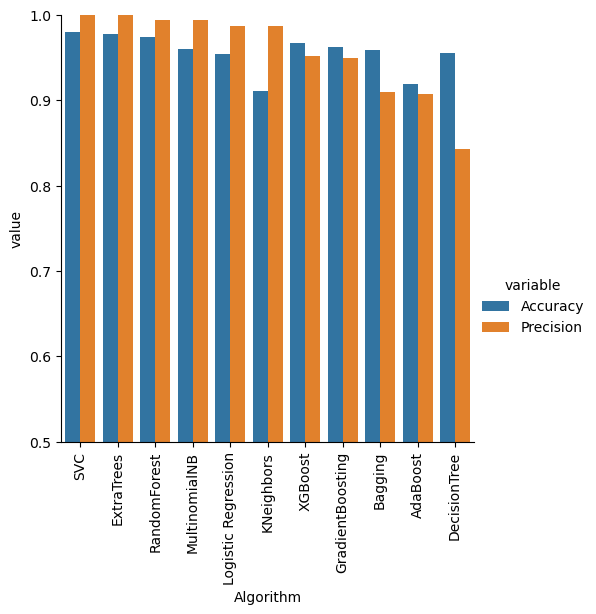

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Algorithm', y='value', 
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


In [108]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [109]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [110]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [111]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [112]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [113]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [114]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.980263,1.000000,0.980263,1.000000,0.980263,1.000000,0.980263,1.000000
1,ExtraTrees,0.977273,1.000000,0.977273,1.000000,0.977273,1.000000,0.977273,1.000000
2,RandomForest,0.974282,0.994536,0.974282,0.994536,0.974282,0.994536,0.974282,0.994536
3,MultinomialNB,0.960526,0.993750,0.960526,0.993750,0.960526,0.993750,0.960526,0.993750
4,Logistic Regression,0.954545,0.986842,0.954545,0.986842,0.954545,0.986842,0.954545,0.986842
5,KNeighbors,0.910287,0.986842,0.910287,0.986842,0.910287,0.986842,0.910287,0.986842
6,XGBoost,0.967105,0.951872,0.967105,0.951872,0.967105,0.951872,0.967105,0.951872
7,GradientBoosting,0.962321,0.949721,0.962321,0.949721,0.962321,0.949721,0.962321,0.949721
8,Bagging,0.958732,0.910053,0.958732,0.910053,0.958732,0.910053,0.958732,0.910053
9,AdaBoost,0.918660,0.907407,0.918660,0.907407,0.918660,0.907407,0.918660,0.907407


In [115]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [116]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [117]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [118]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9814593301435407
Precision 0.9898477157360406


In [119]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [120]:
from sklearn.ensemble import StackingClassifier

In [121]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [122]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9820574162679426
Precision 0.9663461538461539


In [123]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [124]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Load your data as shown previously
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

# Preprocess and split as before
# Use your transform_text function to clean messages
data['clean_message'] = data['message'].apply(transform_text)
X = data['clean_message']
y = data['label_num']

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

model = MultinomialNB()
model.fit(X_tfidf, y)

# Save the fitted vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))
